## Functions

In [1]:
# requries libraries

In [40]:
cluster = ['ahdistus', 'depression', 'itsemurha', 'kaksisuuntainen mielialahäiriö', 'masennus oireet', 
             'masennus', 'masennuslääkkeet', 'masennustesti', 'mielenterveys', 'psykoosi', 'suicide', 'väsymys' ]
directory = 'c:/Users/nafis/Documents/master_thesis_dir/thesis/google_trend_data/GT_update/df_total_all_hours_11_2022.csv'

In [41]:
from cycler import cycler
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 15.0
mpl.rcParams['axes.prop_cycle'] 
plt.style.use('classic')

In [42]:
df_total = pd.read_csv(directory, parse_dates = True, index_col = 'date')
df_total.head()

,ahdistus,clinical depression,crippling depression,depression symptoms,depression test,depression,high functioning depression,itsemurha,kaksisuuntainen mielialahäiriö,keskivaikea masennus,...,nuorten masennus,postpartum depression,psykoosi,psykoottinen masennus,raskaus masennus,suicide,synnytyksen jälkeinen masennus,vaikea masennus,vakava masennus,väsymys
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,14.0,0.0,NaN,0.0,0.0,14.0,NaN,51.0,7.0,0.0,...,0.0,0.0,29.0,0.0,37.0,64.0,0.0,0.0,0.0,10.0
2015-01-01 01:00:00,12.0,0.0,NaN,48.0,31.0,36.0,NaN,22.0,29.0,0.0,...,0.0,0.0,7.0,0.0,53.0,70.0,0.0,0.0,0.0,33.0
2015-01-01 02:00:00,11.0,0.0,NaN,0.0,0.0,52.0,NaN,62.0,41.0,0.0,...,0.0,0.0,27.0,0.0,0.0,48.0,12.0,65.0,0.0,16.0
2015-01-01 03:00:00,7.0,0.0,NaN,0.0,0.0,20.0,NaN,25.0,18.0,0.0,...,0.0,0.0,14.0,0.0,0.0,21.0,0.0,0.0,0.0,21.0
2015-01-01 04:00:00,0.0,0.0,NaN,100.0,0.0,11.0,NaN,18.0,0.0,0.0,...,0.0,0.0,63.0,0.0,0.0,29.0,0.0,0.0,0.0,53.0


In [188]:
df_cluster = df_total.loc[:,cluster]

In [189]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52608 entries, 2015-01-01 00:00:00 to 2020-12-31 23:00:00
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ahdistus                        52273 non-null  float64
 1   depression                      52273 non-null  float64
 2   itsemurha                       52273 non-null  float64
 3   kaksisuuntainen mielialahäiriö  52106 non-null  float64
 4   masennus oireet                 52273 non-null  float64
 5   masennus                        52273 non-null  float64
 6   masennuslääkkeet                52273 non-null  float64
 7   masennustesti                   52106 non-null  float64
 8   mielenterveys                   52273 non-null  float64
 9   psykoosi                        52273 non-null  float64
 10  suicide                         52106 non-null  float64
 11  väsymys                         52273 non-null  float64
dt

In [219]:
""" to aggregate the dates to year,week, month, day, hour"""
def df_year_month_day(df):
    df_year_week_day = df[:]
    weekday_chr = ['Mon', 'Tues', 'Wed','Thurs', 'Fri', 'Sat', 'Sun']
    year = [d.year for d in df.index]
    month= [d.strftime('%b') for d in df.index]
    hour = [d.hour for d in df.index]
    day = [d.day for d in df.index]
    week =[d.isocalendar()[1] for d in df.index]
    weekdays = [weekday_chr[d.weekday()] for d in df.index]   
    df_year_week_day.insert(0,'year',year)
    df_year_week_day.insert(1,'month',month)
    df_year_week_day.insert(2,'day',day)
    df_year_week_day.insert(3,'hour',hour)
    df_year_week_day.insert(4,'week', week)
    day_month = ["{:02d}".format(d)+'-'+str(m) for m,d in zip(month,df_year_week_day['day'])]
    df_year_week_day.insert(5,'day_month', day_month)
    year_month_day = [f'{d.year}-{d.month}-{d.day}' for d in df.index ]
    df_year_week_day.insert(6, 'year_month_day',year_month_day) 
    df_year_week_day.insert(7,'weekday',weekdays)
    for col in ['year', 'day', 'month','hour', 'week', 'weekday']:
        df_year_week_day.loc[:,col] = df_year_week_day[col].astype('category')
    return df_year_week_day


In [364]:
df_agg = df_year_month_day(df_cluster)

C:\Users\nafis\AppData\Local\Temp\ipykernel_15952\3224667603.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_week_day.loc[:,col] = df_year_week_day[col].astype('category')
C:\Users\nafis\AppData\Local\Temp\ipykernel_15952\3224667603.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_week_day.loc[:,col] = df_year_week_day[col].astype('category')
C:\Users\nafis\AppData\Local\Temp\ipykernel_15952\3224667603.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [365]:
df_agg.head()

,year,month,day,hour,week,day_month,year_month_day,weekday,ahdistus,depression,itsemurha,kaksisuuntainen mielialahäiriö,masennus oireet,masennus,masennuslääkkeet,masennustesti,mielenterveys,psykoosi,suicide,väsymys
date,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,2015,Jan,1,0,1,01-Jan,2015-1-1,Thurs,14.0,14.0,51.0,7.0,11.0,22.0,12.0,17.0,27.0,29.0,64.0,10.0
2015-01-01 01:00:00,2015,Jan,1,1,1,01-Jan,2015-1-1,Thurs,12.0,36.0,22.0,29.0,0.0,18.0,0.0,12.0,61.0,7.0,70.0,33.0
2015-01-01 02:00:00,2015,Jan,1,2,1,01-Jan,2015-1-1,Thurs,11.0,52.0,62.0,41.0,12.0,31.0,0.0,18.0,11.0,27.0,48.0,16.0
2015-01-01 03:00:00,2015,Jan,1,3,1,01-Jan,2015-1-1,Thurs,7.0,20.0,25.0,18.0,16.0,14.0,0.0,0.0,0.0,14.0,21.0,21.0
2015-01-01 04:00:00,2015,Jan,1,4,1,01-Jan,2015-1-1,Thurs,0.0,11.0,18.0,0.0,0.0,8.0,0.0,0.0,32.0,63.0,29.0,53.0


In [366]:
df_agg1 = df_agg.drop(['year','month','week','day_month','year_month_day','weekday'], axis = 1)

In [367]:
df_agg1

,day,hour,ahdistus,depression,itsemurha,kaksisuuntainen mielialahäiriö,masennus oireet,masennus,masennuslääkkeet,masennustesti,mielenterveys,psykoosi,suicide,väsymys
date,,,,,,,,,,,,,,
2015-01-01 00:00:00,1,0,14.0,14.0,51.0,7.0,11.0,22.0,12.0,17.0,27.0,29.0,64.0,10.0
2015-01-01 01:00:00,1,1,12.0,36.0,22.0,29.0,0.0,18.0,0.0,12.0,61.0,7.0,70.0,33.0
2015-01-01 02:00:00,1,2,11.0,52.0,62.0,41.0,12.0,31.0,0.0,18.0,11.0,27.0,48.0,16.0
2015-01-01 03:00:00,1,3,7.0,20.0,25.0,18.0,16.0,14.0,0.0,0.0,0.0,14.0,21.0,21.0
2015-01-01 04:00:00,1,4,0.0,11.0,18.0,0.0,0.0,8.0,0.0,0.0,32.0,63.0,29.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,31,19,14.0,8.0,18.0,25.0,0.0,19.0,5.0,11.0,34.0,33.0,13.0,32.0
2020-12-31 20:00:00,31,20,16.0,12.0,29.0,11.0,12.0,23.0,5.0,19.0,30.0,19.0,31.0,27.0
2020-12-31 21:00:00,31,21,12.0,20.0,20.0,22.0,7.0,14.0,5.0,5.0,20.0,6.0,30.0,19.0


In [368]:
from collections import Counter
df = df_agg1[:]
terms = cluster
dict_counter_min = dict()
for term in terms:
    seri_mean = df.groupby(['hour','day'])[term].mean()
    df_mean = seri_mean.unstack()
    # we want to know what is the minimum RSV for each day to then understand which hours it happens
    daily_mins = df_mean.min()
#     print(daily_maxes)  
    min_index_days = []
    for day in range(1,32):
        min_hours = df_mean.loc[:,day] <= daily_mins[day] # to find hours in the day which is equal to minum searches of the day
        min_index =min_hours.index[min_hours].tolist()
        min_index_days.extend(min_index)
    counter = Counter(min_index_days)
    dict_counter_min[term] = Counter(counter)
# print(dict_counter_min)   

In [369]:
from collections import Counter
df = df_agg1[:]
terms = cluster
dict_counter_max = dict()
for term in terms:
    seri_mean = df.groupby(['hour','day'])[term].mean()
    df_mean = seri_mean.unstack()
    # we want to know what is the maximum RSV for each day to then understand which hours it happens
    daily_maxes = df_mean.max()
#     print(daily_maxes)  
    max_index_days = []
    for day in range(1,32):
        max_hours = df_mean.loc[:,day] >= daily_maxes[day]
        max_index =max_hours.index[max_hours].tolist()
        max_index_days.extend(max_index)
    counter = Counter(max_index_days)
    dict_counter_max[term] = Counter(counter)
# print(dict_counter_max)   

In [370]:
dmax= pd.DataFrame()
list_hour = []
list_terms = []
list_mins = []
for term in terms:
    for hour in range(24):
        if dict_counter_max[term][hour] != 0:
            list_hour.append(hour)
            list_mins.append(dict_counter_max[term][hour])
            list_terms.append(term)
dmax['term'] = list_terms
dmax['count'] = list_mins
dmax['hour'] = list_hour

In [371]:
dmin= pd.DataFrame()
list_hour = []
list_terms = []
list_mins = []
for term in terms:
    for hour in range(24):
        if dict_counter_min[term][hour] != 0:
            list_hour.append(hour)
            list_mins.append(dict_counter_min[term][hour])
            list_terms.append(term)
dmin['term'] = list_terms
dmin['count'] = list_mins
dmin['hour'] = list_hour

In [372]:
dmin

,term,count,hour
0,ahdistus,1,5
1,ahdistus,7,6
2,ahdistus,10,7
3,ahdistus,5,8
4,ahdistus,3,11
...,...,...,...
64,väsymys,2,5
65,väsymys,9,6
66,väsymys,5,7
67,väsymys,1,22


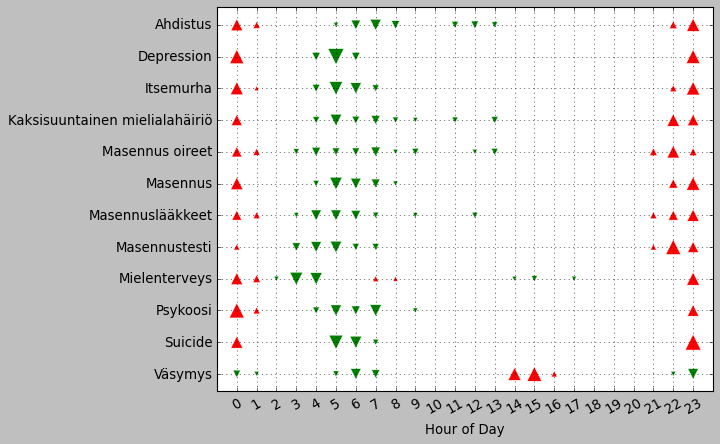

In [386]:
import seaborn as sns
fig, ax = plt.subplots()
sns.scatterplot(data=dmin, x='hour', y='term', size='count',  
              markers=True, legend=False,color = 'g',  ax = ax, marker='v', sizes=(20, 200))
sns.scatterplot(data=dmax, x='hour', y='term', size='count',  
              markers=True, legend=False, color = 'r',ax = ax, marker='^', sizes=(20, 200))
ax.set_xlim(-1,24)
s= ax.set_xticks(range(0,24))
s =ax.set_xticklabels(list(range(0,24)), rotation = 30, size = 'medium')
s= ax.set_yticks(range(0,12))
s =ax.set_yticklabels([i.capitalize() for i in cluster], size = 'medium')
ax.set_ylabel('')
ax.set_xlabel('Hour of Day', size = 'medium')
ax.grid()

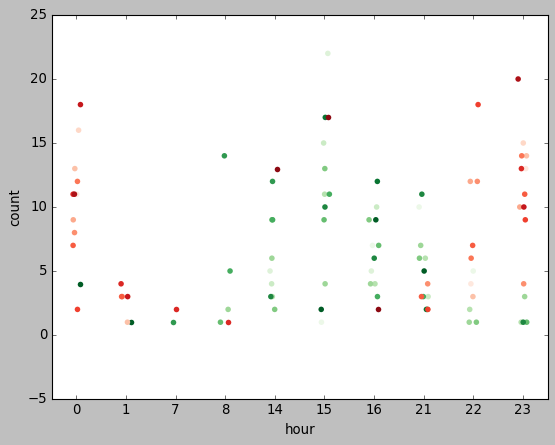

In [243]:
fig, ax = plt.subplots()
sns.stripplot(data=dmin, x='hour', y='count', hue='term', 
              palette = 'Greens', ax = ax)
sns.stripplot(data=dmax, x='hour', y='count', hue='term',  
              palette = 'Reds', ax = ax)
ax.legend().set_visible(False)
plt.show()

In [ ]:
# bellow we wan not plot the count but  to have all above and bellow daily mean for each term during for 31 days

In [233]:
from collections import Counter
df = df_agg1[:]
terms = cluster
dict_above_mean = dict()
for term in terms:
    seri_mean = df.groupby(['hour','day'])[term].mean()
    df_mean = seri_mean.unstack()
    # we want to know what is the maximum RSV for each day to then understand which hours it happens
    daily_maxes = df_mean.max()
#     print(daily_maxes)  
    max_index_days = []
    for day in range(1,32):
        max_hours = df_mean.loc[:,day] >= daily_maxes[day]
        max_index =max_hours.index[max_hours].tolist()
        max_index_days.extend(max_index)
        dict_above_mean[term] = max_index_days
print(dict_above_mean)   

{'ahdistus': [23, 0, 0, 23, 0, 0, 22, 23, 1, 0, 23, 0, 0, 0, 23, 22, 23, 23, 23, 1, 23, 22, 22, 23, 0, 23, 23, 0, 23, 1, 0], 'depression': [23, 23, 0, 23, 23, 23, 0, 0, 23, 0, 23, 23, 0, 0, 0, 23, 23, 0, 23, 0, 0, 23, 23, 0, 0, 0, 23, 23, 0, 0, 0], 'itsemurha': [23, 23, 0, 23, 23, 0, 22, 23, 0, 23, 23, 0, 0, 0, 23, 0, 23, 22, 0, 1, 0, 23, 23, 0, 22, 23, 0, 0, 23, 23, 0], 'kaksisuuntainen mielialahäiriö': [22, 0, 0, 22, 23, 22, 22, 23, 23, 0, 22, 22, 0, 23, 22, 23, 0, 23, 0, 22, 22, 22, 0, 0, 22, 22, 23, 0, 23, 23, 23], 'masennus oireet': [21, 21, 1, 22, 21, 22, 1, 22, 22, 0, 0, 0, 23, 0, 22, 22, 22, 22, 0, 21, 23, 22, 0, 22, 0, 1, 23, 0, 22, 23, 22], 'masennus': [23, 0, 23, 23, 22, 23, 23, 22, 23, 22, 22, 0, 23, 0, 23, 23, 23, 23, 23, 0, 23, 22, 0, 0, 22, 0, 23, 0, 0, 0, 0, 0], 'masennuslääkkeet': [22, 23, 23, 21, 23, 23, 22, 21, 0, 0, 22, 21, 23, 23, 23, 0, 23, 22, 0, 22, 0, 22, 1, 22, 1, 1, 23, 0, 23, 23, 0], 'masennustesti': [22, 22, 22, 22, 0, 22, 22, 22, 22, 22, 23, 21, 22, 23, 22

In [234]:
from collections import Counter
df = df_agg1[:]
terms = cluster
dict_bellow_mean = dict()
for term in terms:
    seri_mean = df.groupby(['hour','day'])[term].mean()
    df_mean = seri_mean.unstack()
    # we want to know what is the maximum RSV for each day to then understand which hours it happens
    daily_mins = df_mean.min()
#     print(daily_maxes)  
    min_index_days = []
    for day in range(1,32):
        min_hours = df_mean.loc[:,day] <= daily_mins[day] # to find hours in the day which is equal to minum searches of the day
        min_index =max_hours.index[min_hours].tolist()
        min_index_days.extend(min_index)
    dict_bellow_mean[term] = min_index_days
print(dict_bellow_mean)  

{'ahdistus': [5, 6, 13, 8, 6, 7, 7, 6, 8, 11, 7, 6, 8, 7, 11, 7, 8, 7, 6, 7, 12, 12, 8, 6, 13, 7, 7, 11, 12, 6, 7, 12], 'depression': [5, 5, 5, 5, 5, 5, 5, 4, 6, 5, 6, 5, 5, 5, 4, 5, 6, 5, 4, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 6], 'itsemurha': [6, 5, 6, 7, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 4, 5, 5, 6, 5, 7, 4, 4, 5, 5, 7, 6, 4, 6, 5, 6], 'kaksisuuntainen mielialahäiriö': [5, 7, 13, 5, 6, 9, 4, 7, 5, 8, 5, 5, 8, 4, 5, 4, 7, 6, 7, 13, 11, 5, 13, 7, 7, 5, 6, 5, 5, 5, 6, 11], 'masennus oireet': [7, 4, 6, 4, 9, 8, 3, 7, 5, 4, 5, 4, 6, 9, 7, 3, 5, 13, 7, 5, 6, 7, 7, 4, 6, 7, 13, 13, 9, 4, 12], 'masennus': [5, 6, 5, 5, 5, 7, 5, 6, 6, 7, 5, 5, 6, 5, 4, 6, 5, 6, 6, 5, 7, 4, 5, 6, 7, 7, 5, 7, 6, 5, 8], 'masennuslääkkeet': [6, 7, 4, 5, 4, 6, 6, 5, 4, 4, 6, 12, 5, 5, 3, 4, 5, 5, 5, 6, 5, 4, 5, 7, 4, 12, 4, 9, 6, 6, 4], 'masennustesti': [4, 6, 4, 3, 5, 6, 5, 5, 4, 5, 4, 5, 5, 4, 6, 4, 5, 5, 4, 4, 3, 5, 3, 5, 3, 7, 4, 3, 7, 5, 7], 'mielenterveys': [3, 4, 2, 3, 3, 4, 3, 3, 3, 3, 15, 4, 3, 4, 4, 3,

In [235]:
above_mean = pd.DataFrame()
list_hour = []
list_terms = []
list_mins = []
for term in terms:
        r = len(dict_above_mean[term])
        list_hour.extend(dict_above_mean[term])
        list_terms.extend([term]*r)
above_mean['term'] = list_terms
above_mean['hour'] = list_hour

In [236]:
bellow_mean = pd.DataFrame()
list_hour = []
list_terms = []
list_mins = []
for term in terms:
        r = len(dict_bellow_mean[term])
        list_hour.extend(dict_bellow_mean[term])
        list_terms.extend([term]*r)
bellow_mean['term'] = list_terms
bellow_mean['hour'] = list_hour

In [237]:
bellow_mean

,term,hour
0,ahdistus,5
1,ahdistus,6
2,ahdistus,13
3,ahdistus,8
4,ahdistus,6
...,...,...
371,väsymys,23
372,väsymys,0
373,väsymys,0
374,väsymys,23


C:\Users\nafis\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nafis\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nafis\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nafis\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nafis\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.9% of the points 

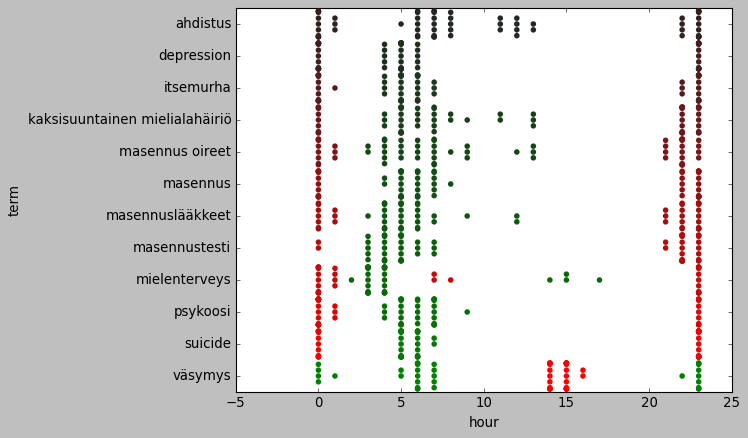

In [197]:
fig, ax = plt.subplots()
sns.swarmplot(data=bellow_mean, x='hour', y='term', hue='term', 
              color = 'g', ax = ax)
sns.swarmplot(data=above_mean, x='hour', y='term', hue='term',  
              color = 'r', ax = ax)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend().set_visible(False)
plt.show()

# Lets make slices for every 24 hours

In [254]:

# def chunk_df(df, chunk= 24):
#     chunks = []
#     CHUNK_SIZE = chunk
#     index_slices = sliced(range(len(df)), CHUNK_SIZE)
#     for index_slice in index_slices:
#         chunk = df.iloc[index_slice] # your dataframe chunk ready for use
#         chunks.append(chunk)
#     df_chunk = pd.concat(chunks, axis = 1)
#     return df_chunk

In [7]:
# from more_itertools import sliced
# dict_chunks = dict()
# CHUNK_SIZE = 24
# df = df_agg[:]
# index_slices = sliced(range(len(df)), CHUNK_SIZE)
# for c, index_slice in enumerate(index_slices):
#     chunk = df.iloc[index_slice] # your dataframe chunk ready for use
#     dict_chunks[c] = chunk 

In [238]:
df_agg.head()

,year,month,day,hour,week,day_month,year_month_day,weekday,ahdistus,depression,itsemurha,kaksisuuntainen mielialahäiriö,masennus oireet,masennus,masennuslääkkeet,masennustesti,mielenterveys,psykoosi,suicide,väsymys
date,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,2015,Jan,1,0,1,01-Jan,2015-1-1,Thurs,14.0,14.0,51.0,7.0,11.0,22.0,12.0,17.0,27.0,29.0,64.0,10.0
2015-01-01 01:00:00,2015,Jan,1,1,1,01-Jan,2015-1-1,Thurs,12.0,36.0,22.0,29.0,0.0,18.0,0.0,12.0,61.0,7.0,70.0,33.0
2015-01-01 02:00:00,2015,Jan,1,2,1,01-Jan,2015-1-1,Thurs,11.0,52.0,62.0,41.0,12.0,31.0,0.0,18.0,11.0,27.0,48.0,16.0
2015-01-01 03:00:00,2015,Jan,1,3,1,01-Jan,2015-1-1,Thurs,7.0,20.0,25.0,18.0,16.0,14.0,0.0,0.0,0.0,14.0,21.0,21.0
2015-01-01 04:00:00,2015,Jan,1,4,1,01-Jan,2015-1-1,Thurs,0.0,11.0,18.0,0.0,0.0,8.0,0.0,0.0,32.0,63.0,29.0,53.0


In [387]:
num_days = int(len(df_agg)/24)
days = [[i]*24 for i in range(1,num_days+1)] # a list of list to repeat a same day for every 24 hours
all_day = [l for i in days for l in i] # to make a list of list of list
df_agg.insert(0,'all_days', all_day)

In [388]:
df_agg.head()

,all_days,year,month,day,hour,week,day_month,year_month_day,weekday,ahdistus,...,itsemurha,kaksisuuntainen mielialahäiriö,masennus oireet,masennus,masennuslääkkeet,masennustesti,mielenterveys,psykoosi,suicide,väsymys
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,1,2015,Jan,1,0,1,01-Jan,2015-1-1,Thurs,14.0,...,51.0,7.0,11.0,22.0,12.0,17.0,27.0,29.0,64.0,10.0
2015-01-01 01:00:00,1,2015,Jan,1,1,1,01-Jan,2015-1-1,Thurs,12.0,...,22.0,29.0,0.0,18.0,0.0,12.0,61.0,7.0,70.0,33.0
2015-01-01 02:00:00,1,2015,Jan,1,2,1,01-Jan,2015-1-1,Thurs,11.0,...,62.0,41.0,12.0,31.0,0.0,18.0,11.0,27.0,48.0,16.0
2015-01-01 03:00:00,1,2015,Jan,1,3,1,01-Jan,2015-1-1,Thurs,7.0,...,25.0,18.0,16.0,14.0,0.0,0.0,0.0,14.0,21.0,21.0
2015-01-01 04:00:00,1,2015,Jan,1,4,1,01-Jan,2015-1-1,Thurs,0.0,...,18.0,0.0,0.0,8.0,0.0,0.0,32.0,63.0,29.0,53.0


In [241]:
# teh first term is started at 9 column
df_agg_melted = pd.melt(df_agg, id_vars=['all_days','hour'], value_vars=df_agg.iloc[:,9:], var_name='term', 
                        value_name='RSV', ignore_index=False)

In [242]:
# to change tyoe data of all_day to category
df_agg_melted['all_days'].astype('category')

date
2015-01-01 00:00:00       1
2015-01-01 01:00:00       1
2015-01-01 02:00:00       1
2015-01-01 03:00:00       1
2015-01-01 04:00:00       1
                       ... 
2020-12-31 19:00:00    2192
2020-12-31 20:00:00    2192
2020-12-31 21:00:00    2192
2020-12-31 22:00:00    2192
2020-12-31 23:00:00    2192
Name: all_days, Length: 631296, dtype: category
Categories (2192, int64): [1, 2, 3, 4, ..., 2189, 2190, 2191, 2192]

In [243]:
df_agg_melted

,all_days,hour,term,RSV
date,,,,
2015-01-01 00:00:00,1,0,ahdistus,14.0
2015-01-01 01:00:00,1,1,ahdistus,12.0
2015-01-01 02:00:00,1,2,ahdistus,11.0
2015-01-01 03:00:00,1,3,ahdistus,7.0
2015-01-01 04:00:00,1,4,ahdistus,0.0
...,...,...,...,...
2020-12-31 19:00:00,2192,19,väsymys,32.0
2020-12-31 20:00:00,2192,20,väsymys,27.0
2020-12-31 21:00:00,2192,21,väsymys,19.0


In [249]:
# we want to add a column with daily mean 
df_agg_melted = df_agg_melted.fillna(0) # replace nan with zero
daily_mean = df_agg_melted.groupby(['term','all_days'])['RSV'].mean()
df_daily_mean = daily_mean.unstack()

# 13 is number of terms 
r = []
for j in range(12):
    # for each term there are 2192 days, we want to repeat each element for 24 hours then to add it to df_agg_melted dataframe
    r.extend([np.ones(24, dtype=int)*int(i) for i in df_daily_mean.iloc[j,:]])
mean_daily = [i for d in r for i in d]

In [251]:
df_agg_melted.insert(4,'daily_mean', mean_daily)

In [252]:
df_agg_melted

,all_days,hour,term,RSV,daily_mean
date,,,,,
2015-01-01 00:00:00,1,0,ahdistus,14.0,15
2015-01-01 01:00:00,1,1,ahdistus,12.0,15
2015-01-01 02:00:00,1,2,ahdistus,11.0,15
2015-01-01 03:00:00,1,3,ahdistus,7.0,15
2015-01-01 04:00:00,1,4,ahdistus,0.0,15
...,...,...,...,...,...
2020-12-31 19:00:00,2192,19,väsymys,32.0,33
2020-12-31 20:00:00,2192,20,väsymys,27.0,33
2020-12-31 21:00:00,2192,21,väsymys,19.0,33


In [308]:
# dataframe of mean of hourly RSV for each term
df_ = df_agg_melted.groupby(['term', 'hour'])['RSV'].mean()
df_ = df_.unstack()

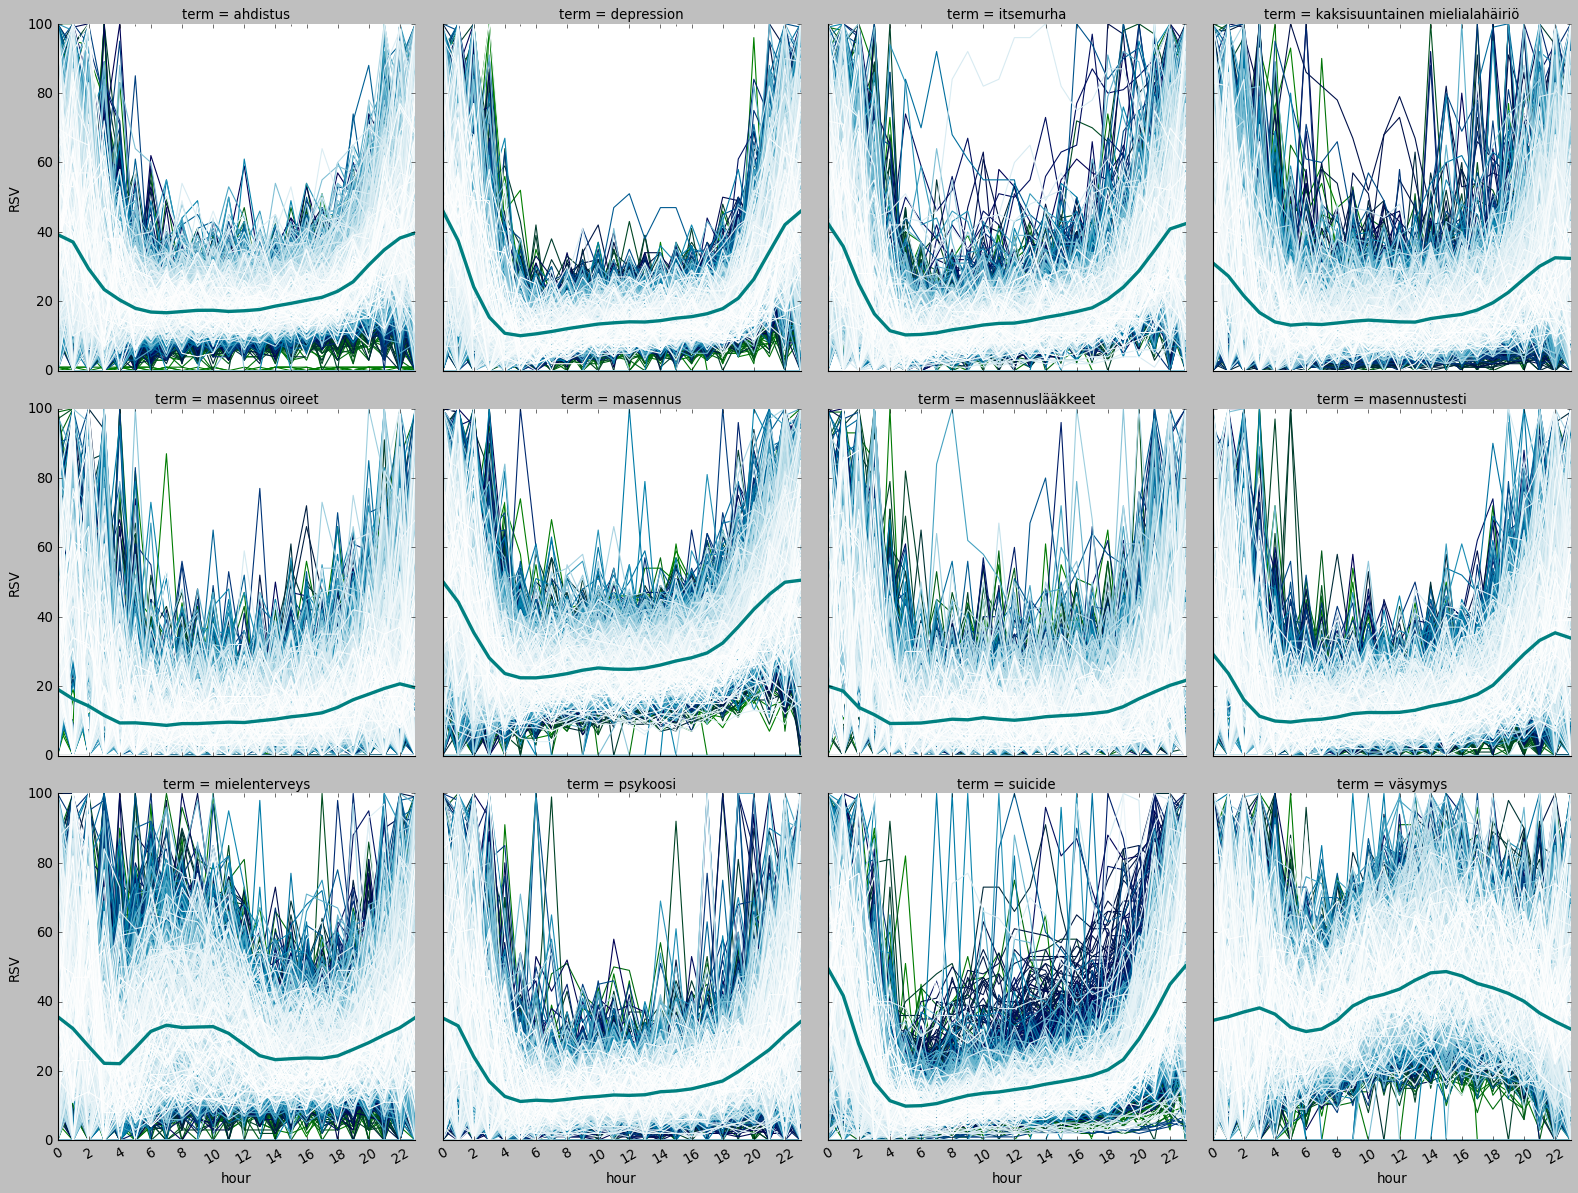

In [320]:
import seaborn as sns

g = sns.relplot(data=df_agg_melted, x='hour', y='RSV', hue='all_days',
                 col='term', col_wrap=4, 
                palette='ocean',legend=False, 
                kind='line', height=5, aspect=1)
for i,term in enumerate(cluster):
    df_.loc[term,:].plot.line(ax = g.axes.flatten()[i], color = 'teal', linewidth = '3') 
for i in range(1,5):
    g.axes.flatten()[-i].set_xticks(range(0,24,2))
    g.axes.flatten()[-i].set_xticklabels(list(range(0,24,2)), rotation = 30, size = 'medium')
    
    
#     g.flatten()[-i].set_xticklabels(list(range(24)))
  


# g.axes.flatten()[-1].get_xticklabels()
# p= plt.xticks(rotation = 90, size = 'medium')
# g.add_legend(fontsize = 15) 
# plt.show()

In [389]:
df_agg1 = df_agg.drop(['year','month','week','day_month','year_month_day','weekday','day'], axis = 1)

In [390]:
df_agg1.head()

,all_days,hour,ahdistus,depression,itsemurha,kaksisuuntainen mielialahäiriö,masennus oireet,masennus,masennuslääkkeet,masennustesti,mielenterveys,psykoosi,suicide,väsymys
date,,,,,,,,,,,,,,
2015-01-01 00:00:00,1,0,14.0,14.0,51.0,7.0,11.0,22.0,12.0,17.0,27.0,29.0,64.0,10.0
2015-01-01 01:00:00,1,1,12.0,36.0,22.0,29.0,0.0,18.0,0.0,12.0,61.0,7.0,70.0,33.0
2015-01-01 02:00:00,1,2,11.0,52.0,62.0,41.0,12.0,31.0,0.0,18.0,11.0,27.0,48.0,16.0
2015-01-01 03:00:00,1,3,7.0,20.0,25.0,18.0,16.0,14.0,0.0,0.0,0.0,14.0,21.0,21.0
2015-01-01 04:00:00,1,4,0.0,11.0,18.0,0.0,0.0,8.0,0.0,0.0,32.0,63.0,29.0,53.0


In [356]:
from collections import Counter

df = df_agg1[:]
terms = cluster
dict_counter_min = dict()
for term in terms:
    daily_mean = df.groupby(['all_days'])[term].mean()
    daily_std = df.groupby(['all_days'])[term].std()
    min_index_days = []
    for day in range(1,len(daily_mean)+1):
        df_term = df_agg1.loc[:,[term,'all_days','hour']]
        min_hours = df_term.loc[df_term['all_days']==day][term] <= daily_mean[day]-daily_std[day] # to find hours in the day which is equal to minum searches of the day
#         print(min_hours)
        min_index =min_hours.index[min_hours].tolist()
        min_index_days.extend(min_index)
    hours_bellow_mean = df_term.loc[min_index_days,'hour'].values
    counter = Counter(hours_bellow_mean)
    dict_counter_min[term] = Counter(counter)
# print(dict_counter_min)   
    



In [357]:
dict_counter_min['depression']

Counter({0: 347,
         4: 1992,
         5: 2083,
         6: 2113,
         7: 2101,
         8: 2070,
         9: 2056,
         10: 2022,
         11: 2000,
         12: 1995,
         14: 1942,
         16: 1834,
         18: 1522,
         19: 1100,
         13: 1965,
         17: 1723,
         20: 565,
         1: 593,
         15: 1864,
         21: 247,
         22: 172,
         3: 1609,
         2: 1117,
         23: 246})

In [358]:
from collections import Counter
df = df_agg1[:]
terms = cluster
dict_counter_max = dict()
for term in terms:
    daily_mean = df.groupby(['all_days'])[term].mean()
    daily_std = df.groupby(['all_days'])[term].std()
    max_index_days = []
    for day in range(1,len(daily_mean)+1):
        df_term = df_agg1.loc[:,[term,'all_days','hour']]
        max_hours = df_term.loc[df_term['all_days']==day][term] >= daily_mean[day]+daily_std[day] # to find hours in the day which is equal to minum searches of the day
#         print(min_hours)
        max_index =min_hours.index[max_hours].tolist()
        max_index_days.extend(max_index)
    hours_above_mean = df_term.loc[max_index_days,'hour'].values
    counter = Counter(hours_above_mean)
    dict_counter_max[term] = Counter(counter)

In [359]:
dict_counter_max['depression']

Counter({1: 1594,
         2: 1070,
         3: 579,
         13: 220,
         15: 324,
         17: 465,
         20: 1625,
         21: 1941,
         22: 2014,
         23: 1939,
         0: 1840,
         16: 357,
         10: 169,
         19: 1092,
         4: 194,
         5: 103,
         18: 667,
         14: 246,
         8: 117,
         9: 131,
         11: 187,
         6: 72,
         12: 193,
         7: 85})

In [360]:
dailymax= pd.DataFrame()
list_hour = []
list_terms = []
list_mins = []
for term in cluster:
    for hour in range(24):
        if dict_counter_max[term][hour] != 0:
            list_hour.append(hour)
            list_mins.append(dict_counter_max[term][hour])
            list_terms.append(term)
dailymax['term'] = list_terms
dailymax['count'] = list_mins
dailymax['hour'] = list_hour

In [361]:
dailymin= pd.DataFrame()
list_hour = []
list_terms = []
list_mins = []
for term in terms:
    for hour in range(24):
        if dict_counter_min[term][hour] != 0:
            list_hour.append(hour)
            list_mins.append(dict_counter_min[term][hour])
            list_terms.append(term)
dailymin['term'] = list_terms
dailymin['count'] = list_mins
dailymin['hour'] = list_hour

<AxesSubplot:xlabel='hour', ylabel='term'>

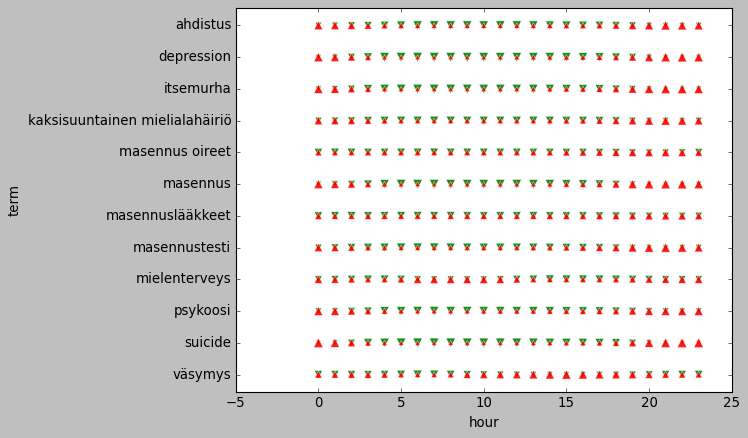

In [363]:
import seaborn as sns
fig, ax = plt.subplots()
sns.scatterplot(data=dailymin, x='hour', y='term', size='count',  
              markers=True, legend=False,color = 'g',  ax = ax, marker='v', alpha = .9)
sns.scatterplot(data=dailymax, x='hour', y='term', size='count',  
              markers=True, legend=False, color = 'r',ax = ax, marker='^', alpha = .9)

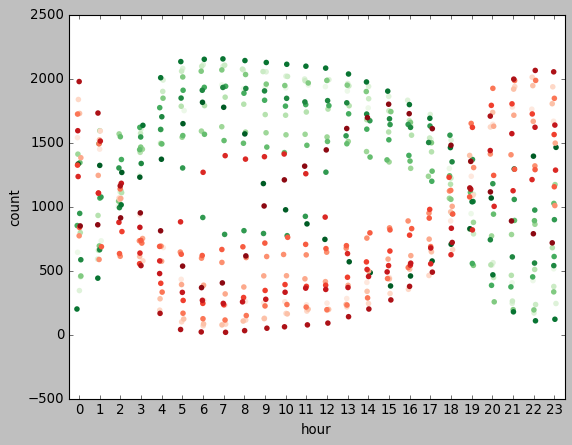

In [385]:
fig, ax = plt.subplots()
sns.stripplot(data=dailymin, x='hour', y='count', hue='term', 
              palette = 'Greens', ax = ax)
sns.stripplot(data=dailymax, x='hour', y='count', hue='term',  
              palette = 'Reds', ax = ax)
ax.legend().set_visible(False)
plt.show()

In [391]:
from collections import Counter

df = df_agg1[:]
terms = cluster
dict_bellow_min = dict()
for term in terms:
    daily_mean = df.groupby(['all_days'])[term].mean()
    min_index_days = []
    for day in range(1,len(daily_mean)+1):
        df_term = df_agg1.loc[:,[term,'all_days','hour']]
        min_hours = df_term.loc[df_term['all_days']==day][term] <= daily_mean[day] # to find hours in the day which is equal to minum searches of the day
#         print(min_hours)
        min_index =min_hours.index[min_hours].tolist()
        min_index_days.extend(min_index)
    hours_bellow_mean = df_term.loc[min_index_days,'hour'].values
    dict_bellow_min[term] = hours_bellow_mean

In [ ]:
# from collections import Counter
# df = df_agg1[:]
# terms = cluster
# dict_above_mean = dict()
# for term in terms:
#     seri_mean = df.groupby(['hour','day'])[term].mean()
#     df_mean = seri_mean.unstack()
#     # we want to know what is the maximum RSV for each day to then understand which hours it happens
#     daily_maxes = df_mean.max()
# #     print(daily_maxes)  
#     max_index_days = []
#     for day in range(1,32):
#         max_hours = df_mean.loc[:,day] >= daily_maxes[day]
#         max_index =max_hours.index[max_hours].tolist()
#         max_index_days.extend(max_index)
#         dict_above_mean[term] = max_index_days
# print(dict_above_mean)   

In [392]:
from collections import Counter

df = df_agg1[:]
terms = cluster
dict_bellow_mean = dict()
for term in terms:
    daily_mean = df.groupby(['all_days'])[term].mean()
    min_index_days = []
    for day in range(1,len(daily_mean)+1):
        df_term = df_agg1.loc[:,[term,'all_days','hour']]
        min_hours = df_term.loc[df_term['all_days']==day][term] <= daily_mean[day] # to find hours in the day which is equal to minum searches of the day
#         print(min_hours)
        min_index =min_hours.index[min_hours].tolist()
        min_index_days.extend(min_index)
    hours_bellow_mean = df_term.loc[min_index_days,'hour'].values
    dict_bellow_mean[term] = hours_bellow_mean

In [ ]:
# from collections import Counter
# df = df_agg1[:]
# terms = cluster
# dict_bellow_mean = dict()
# for term in terms:
#     seri_mean = df.groupby(['hour','day'])[term].mean()
#     df_mean = seri_mean.unstack()
#     # we want to know what is the maximum RSV for each day to then understand which hours it happens
#     daily_mins = df_mean.min()
# #     print(daily_maxes)  
#     min_index_days = []
#     for day in range(1,32):
#         min_hours = df_mean.loc[:,day] <= daily_mins[day] # to find hours in the day which is equal to minum searches of the day
#         min_index =max_hours.index[min_hours].tolist()
#         min_index_days.extend(min_index)
#     dict_bellow_mean[term] = min_index_days
# print(dict_bellow_mean)  

In [393]:
above_mean = pd.DataFrame()
list_hour = []
list_terms = []
list_mins = []
for term in terms:
        r = len(dict_above_mean[term])
        list_hour.extend(dict_above_mean[term])
        list_terms.extend([term]*r)
above_mean['term'] = list_terms
above_mean['hour'] = list_hour

In [394]:
bellow_mean = pd.DataFrame()
list_hour = []
list_terms = []
list_mins = []
for term in terms:
        r = len(dict_bellow_mean[term])
        list_hour.extend(dict_bellow_mean[term])
        list_terms.extend([term]*r)
bellow_mean['term'] = list_terms
bellow_mean['hour'] = list_hour

In [395]:
fig, ax = plt.subplots()
sns.swarmplot(data=bellow_mean, x='hour', y='term', hue='term', 
              color = 'g', ax = ax)
sns.swarmplot(data=above_mean, x='hour', y='term', hue='term',  
              color = 'r', ax = ax)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend().set_visible(False)
plt.show()

C:\Users\nafis\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 99.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nafis\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 99.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001BC0E9E2430> (for post_execute):


KeyboardInterrupt: 